In [1]:
# Multiple linear regression
# predict individual medical costs billed by health insurance
# question: How much is the health insurance, given all these factors(columns)
# y is the health insurance charge
# x are all the features given

In [2]:
# import data manipulation libraries
import pandas as pd
import numpy as np

In [3]:
# import dataset
df = pd.read_csv('insurance.csv')
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:

df.shape

(1338, 7)

In [5]:
# understanding the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# check out missing values
df.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [7]:
# Label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = ['sex', 'smoker', 'region']
df[cols] = df[cols].apply(le.fit_transform)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [8]:
# get all the x variables for prediction
# used only this 3 variables because they are numbers not text based
x = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]

In [9]:
# get the y variable we are trying to predict
y = df[['charges']]

In [10]:
# split data set into training and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [11]:
# build and train our model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
print(model.coef_)
# get R^2
print("r^2: ",model.score(x_train, y_train))



[[  254.62836569  -165.33951865   315.59357821   505.67281371
  23606.66913245  -481.28222499]]
r^2:  0.7459433951649012


In [12]:
print(model.intercept_)
# means that when no x variables(factors) are considered, the charge will be the intercept

[-10845.99004166]


In [13]:
# make predictions from the model
predictions = model.predict(x_test)

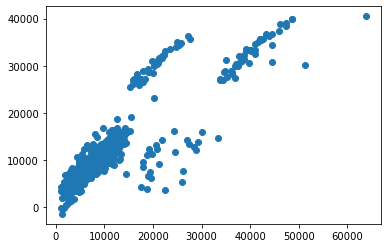

In [14]:
import matplotlib.pyplot as plt
plt.scatter(y_test, predictions)

(array([ 36.,  25., 167.,  96.,   9.,  47.,   7.,   8.,   4.,   3.]),
 array([-11424.71611186,  -7956.23549277,  -4487.75487368,  -1019.27425458,
          2449.20636451,   5917.6869836 ,   9386.16760269,  12854.64822178,
         16323.12884087,  19791.60945996,  23260.09007906]),
 <BarContainer object of 10 artists>)

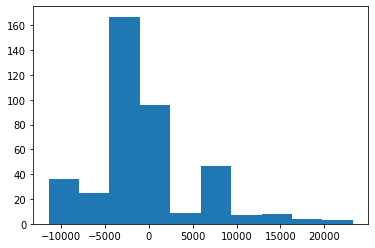

In [15]:
plt.hist(y_test - predictions)